# Synthetic Data Analysis: Energy Efficiency Dataset (Mostly AI)

## Objective
In this notebook, we analyze synthetic data generated from the **UCI Energy Efficiency dataset** using **Mostly AI**.  
Goals:
1. Perform **EDA** (univariate, bivariate, multivariate) for the synthetic dataset.
2. Train advanced ML models and evaluate results.
3. Compare results qualitatively with the baseline real-data analysis (Notebook 01).

In [6]:
import pandas as pd

# Load Mostly AI synthetic dataset (CSV downloaded from platform)
synthetic_df = pd.read_csv(r"C:\Users\ziadb\Documents\GitHub\eda_energy_project\data\energy_effeciency_synthetic.csv")

synthetic_df.head(), synthetic_df.shape

(   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
 0                  0.82         514.5      294.0     110.25             7.0   
 1                  0.98         514.5      294.0     110.25             7.0   
 2                  0.79         661.5      416.5     122.50             7.0   
 3                  0.86         588.0      294.0     147.00             7.0   
 4                  0.76         661.5      416.5     122.50             7.0   
 
    Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
 0            5           0.4                          3        32.610   
 1            4           0.0                          0        28.065   
 2            5           0.1                          3        37.092   
 3            3           0.1                          0        26.064   
 4            4           0.1                          1        35.661   
 
    Cooling_Load  
 0         30.07  
 1         30.45  
 2         33.8

### Dataset Info
- Columns mirror the real dataset: 8 features, 2 targets.
- Sample size = 2000 rows (synthetic).
- Preserves schema exactly as the real dataset.

### Quality Check
- Validating Mostly AI's Reports show decent consistency and accuracy of 87.7%.
- Somewhat decent correlations.
- Statistical Analysis Shows identical distributions.

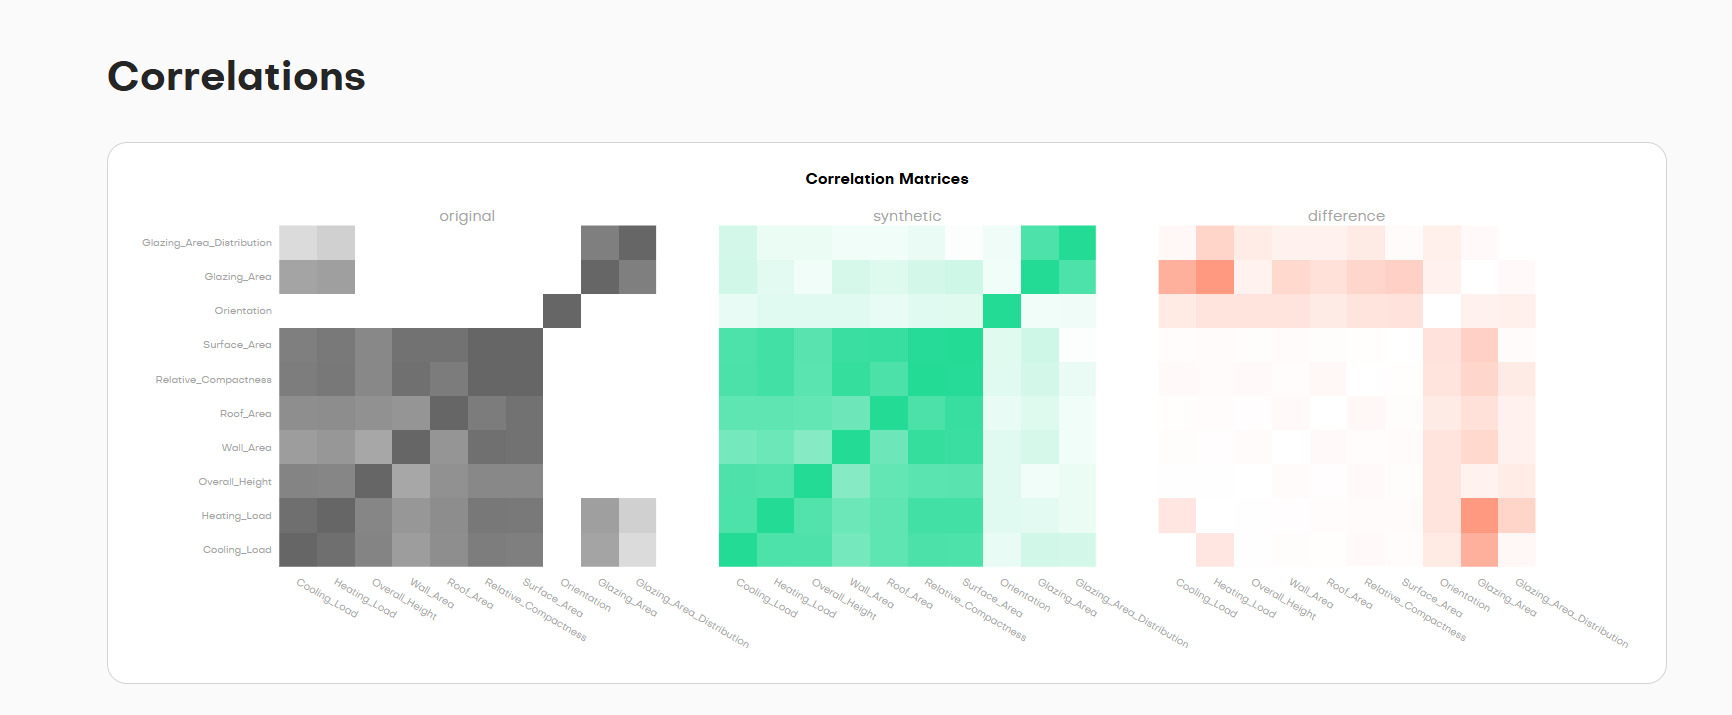

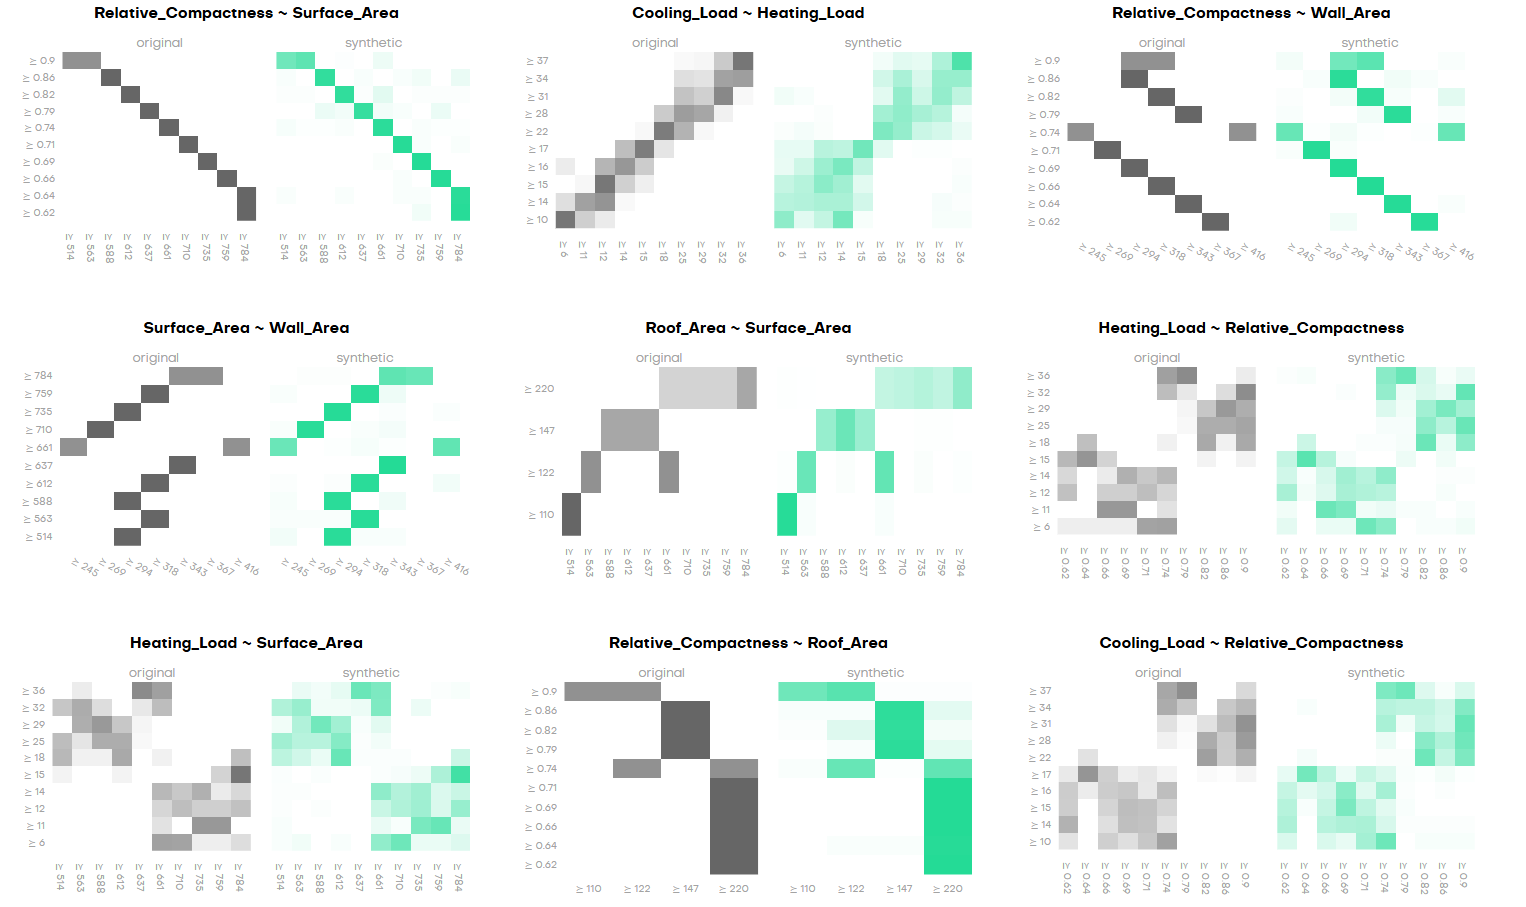

## 2. Univariate Analysis
We explore distributions of each feature individually.
- Visualize histograms + KDE in grid.
- Boxplots to check spread/outliers.

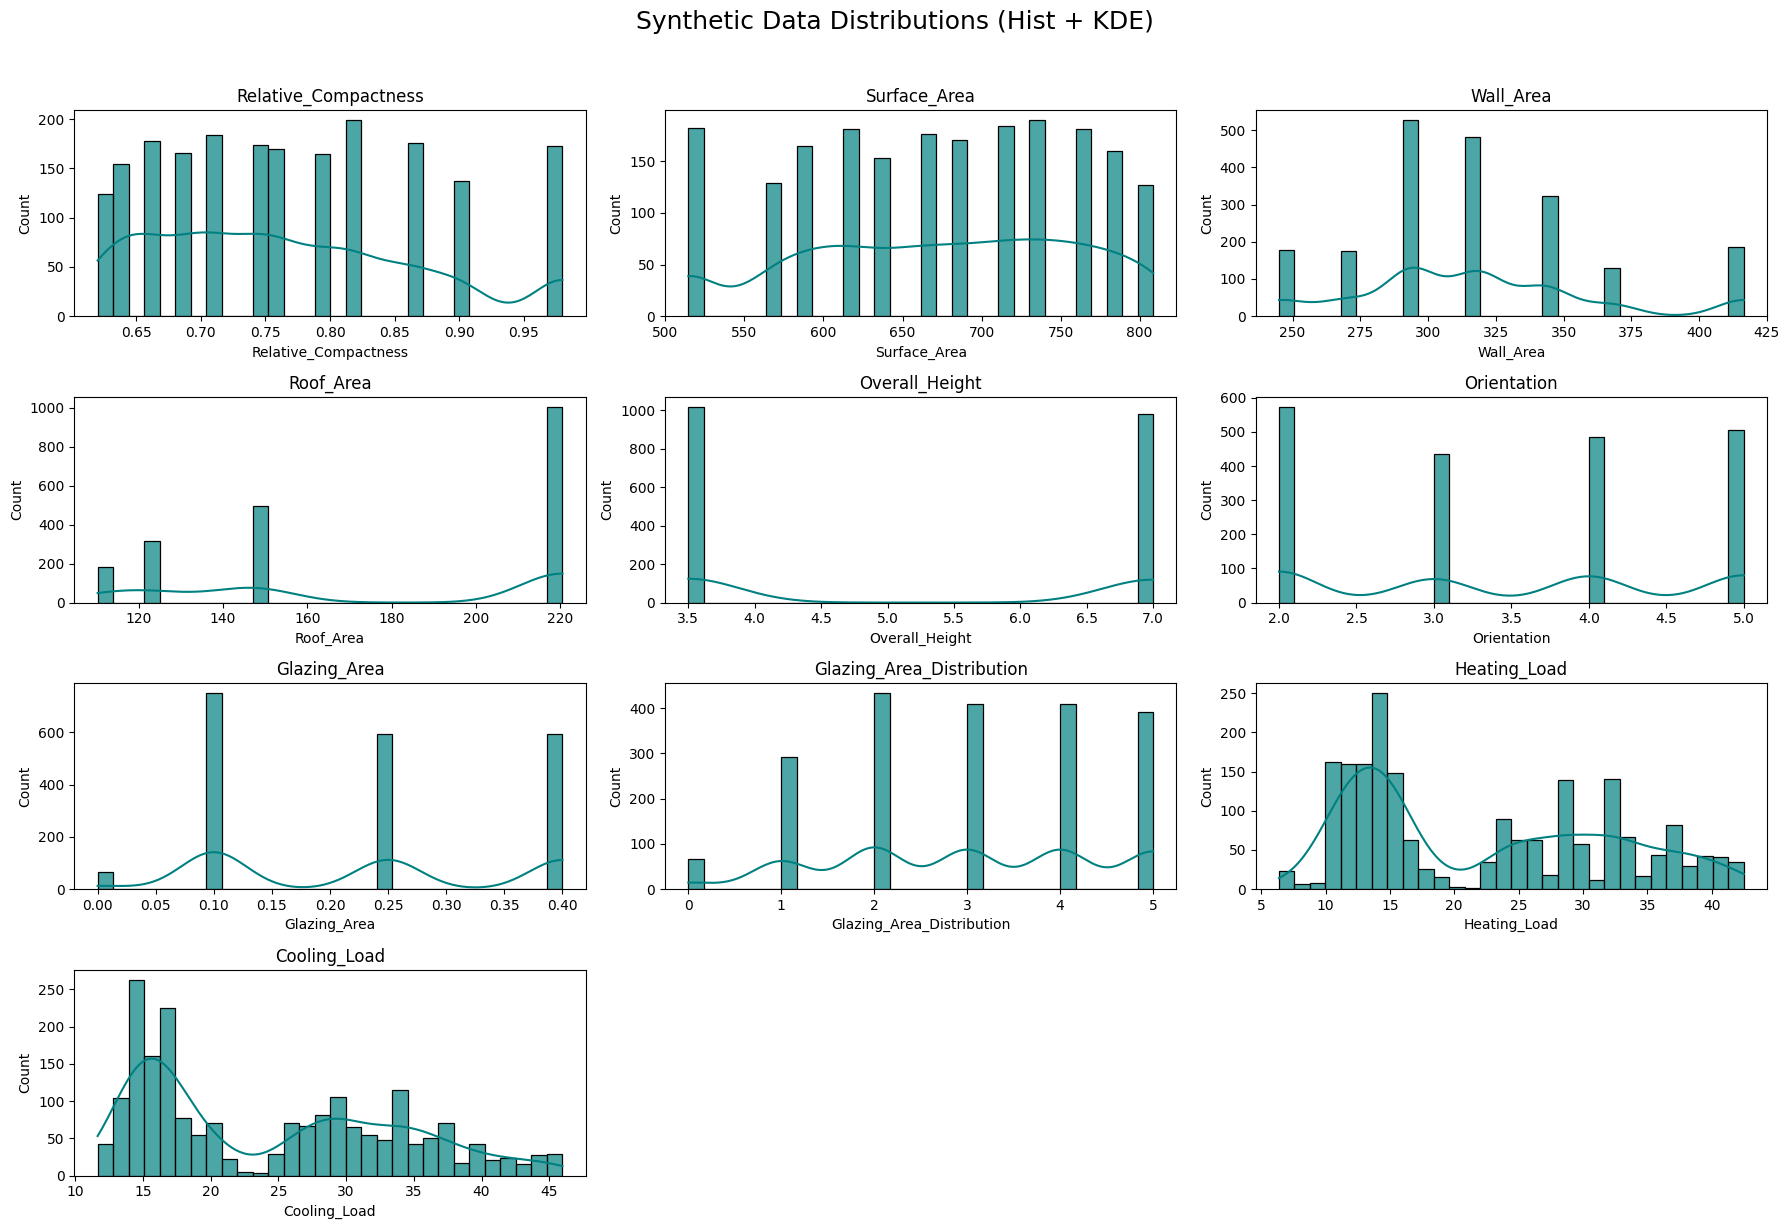

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = synthetic_df.columns
n_cols = 3
n_rows = int(np.ceil(len(cols)/n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18,12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(synthetic_df[col], kde=True, bins=30, ax=axes[i], color="teal", alpha=0.7)
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Synthetic Data Distributions (Hist + KDE)", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

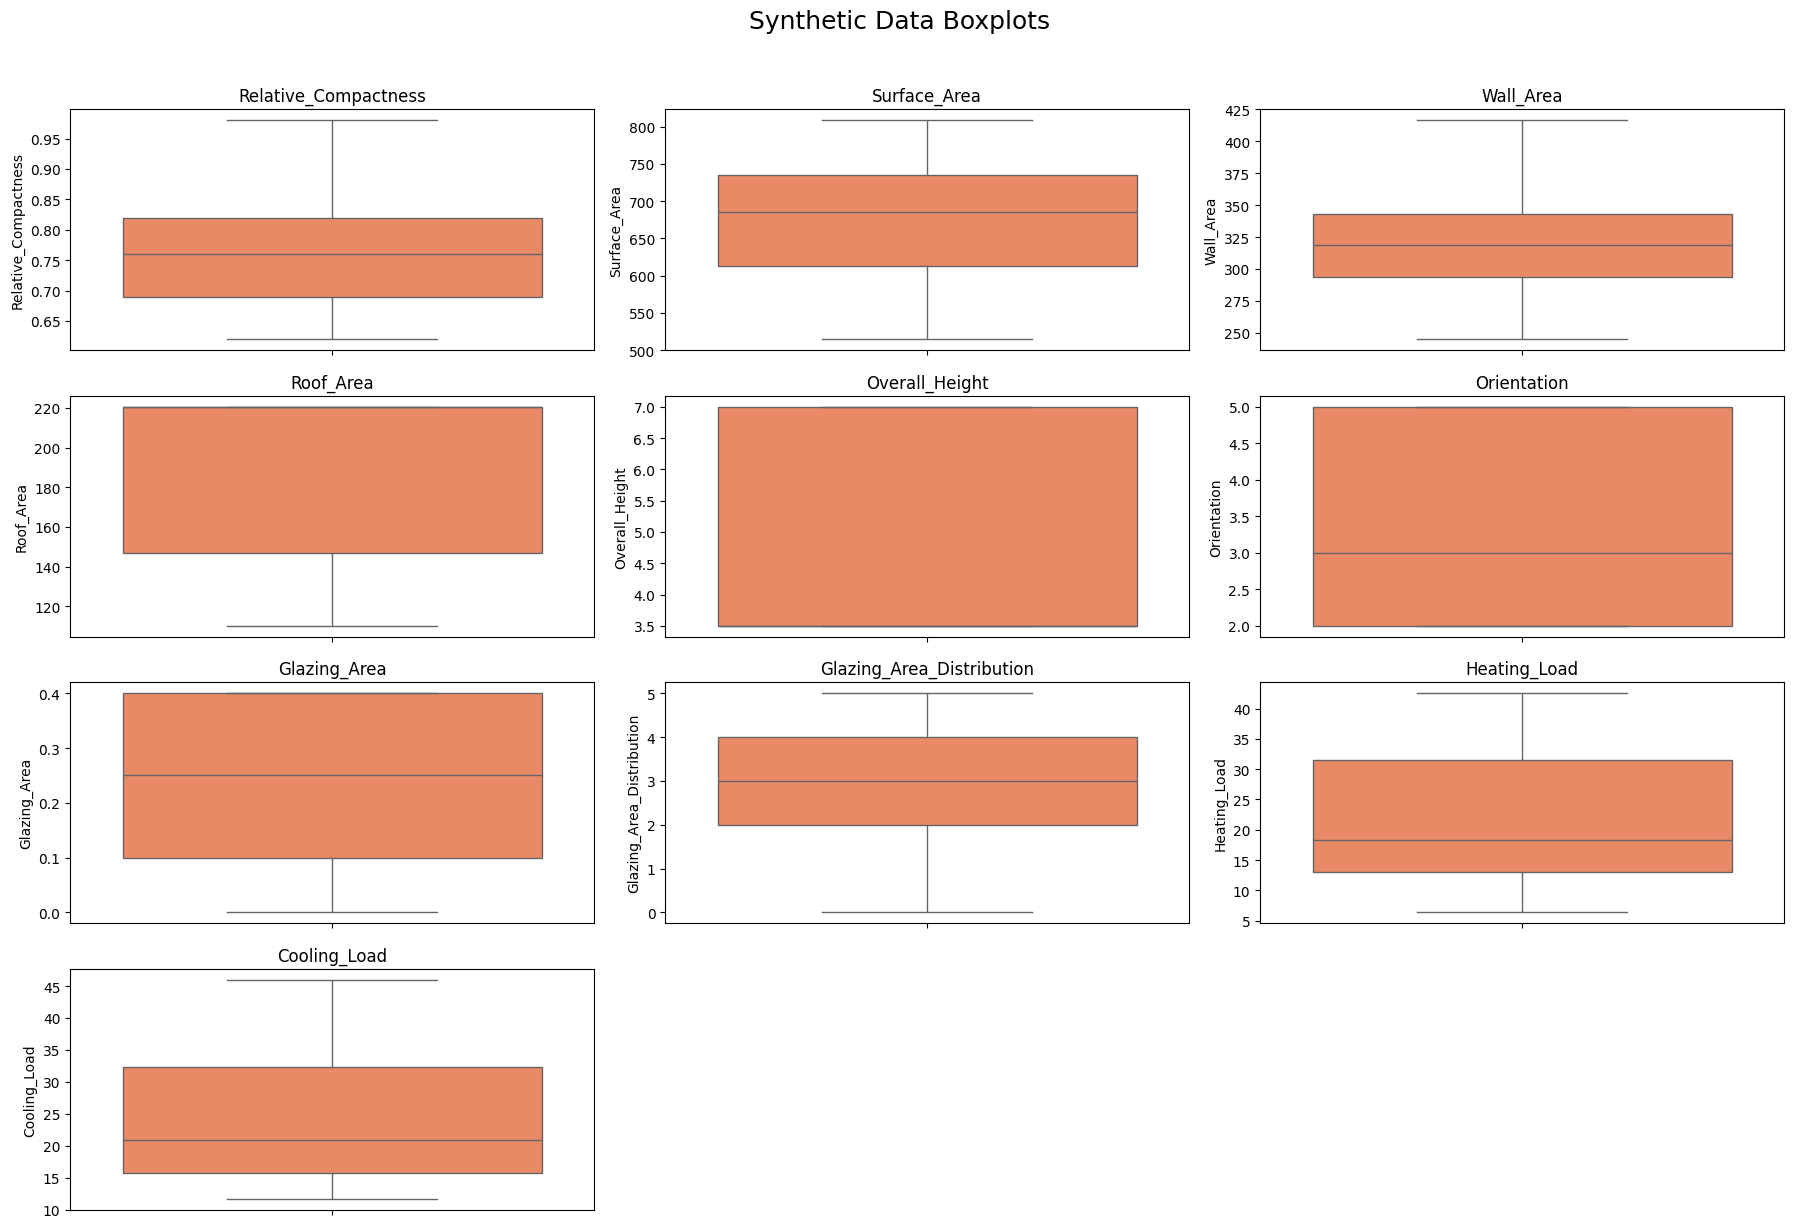

In [8]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18,12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(y=synthetic_df[col], ax=axes[i], color="coral")
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Synthetic Data Boxplots", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

## 3. Bivariate Analysis
We now explore relationships between features and targets.
- Correlation Heatmap
- Grid scatter plots (features vs. Heating & Cooling Load)

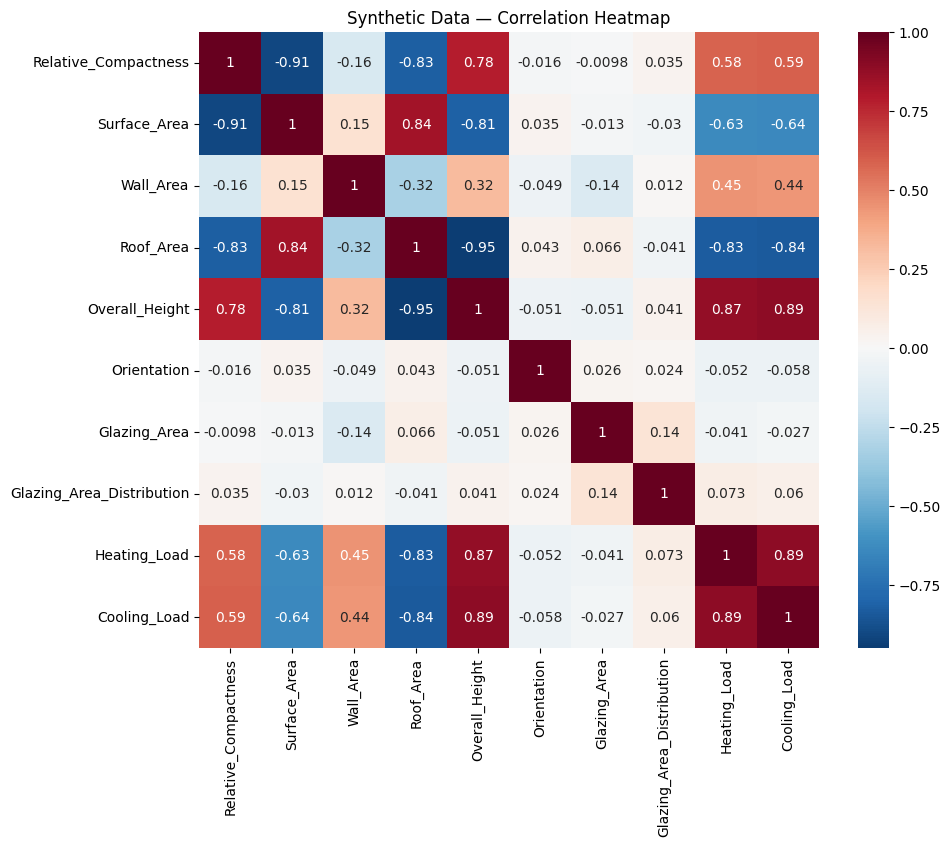

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(synthetic_df.corr(), annot=True, cmap="RdBu_r", center=0)
plt.title("Synthetic Data — Correlation Heatmap")
plt.show()

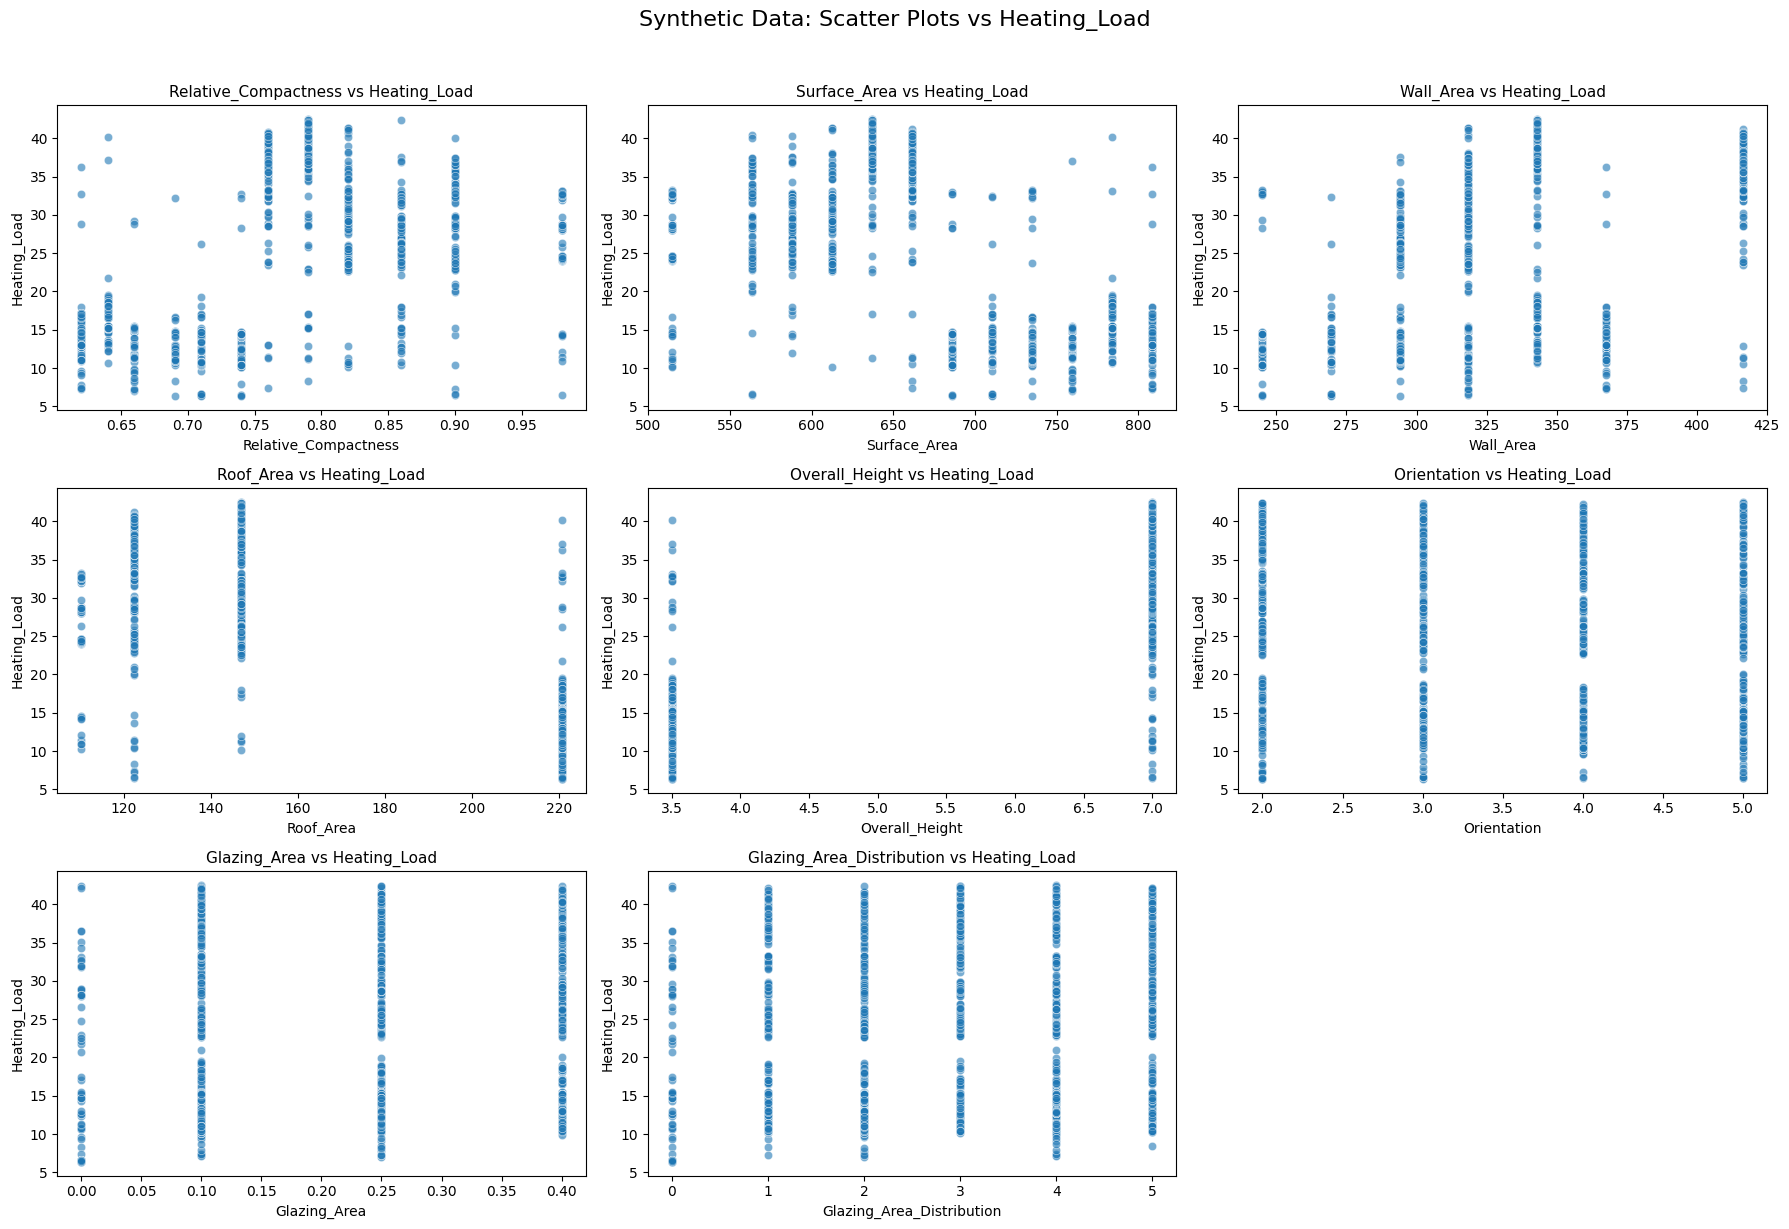

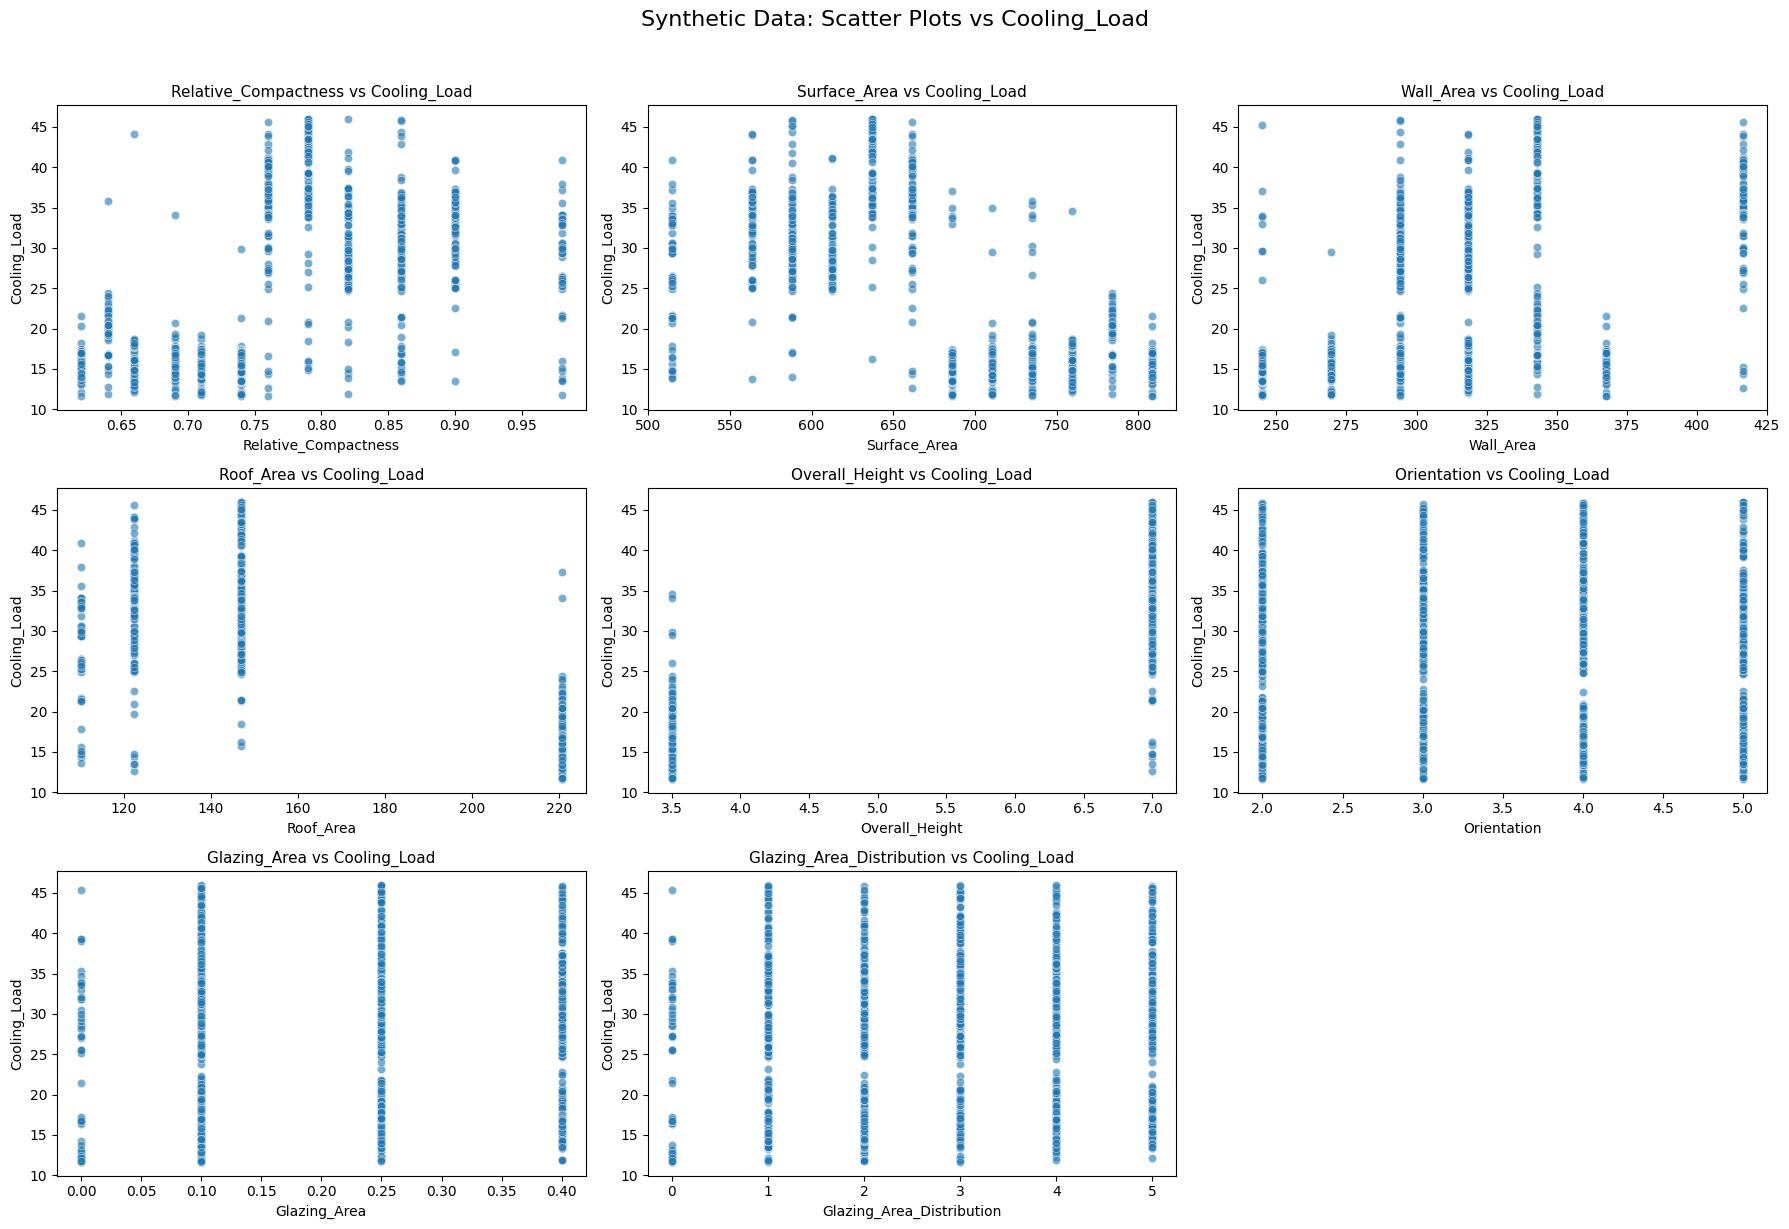

In [11]:
features = [col for col in synthetic_df.columns if col not in ["Heating_Load", "Cooling_Load"]]
targets = ["Heating_Load", "Cooling_Load"]

for target in targets:
    n_cols = 3
    n_rows = int(np.ceil(len(features)/n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18,12))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        sns.scatterplot(x=synthetic_df[feature], y=synthetic_df[target], ax=axes[i], alpha=0.6)
        axes[i].set_title(f"{feature} vs {target}", fontsize=11)
        
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.suptitle(f"Synthetic Data: Scatter Plots vs {target}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

## 4. Multivariate Exploration
We check combined interactions:
- Boxplots/Violin plots for categorical features (`Orientation`, `Glazing_Area_Distribution`)
- 3D scatterplots for continuous interactions

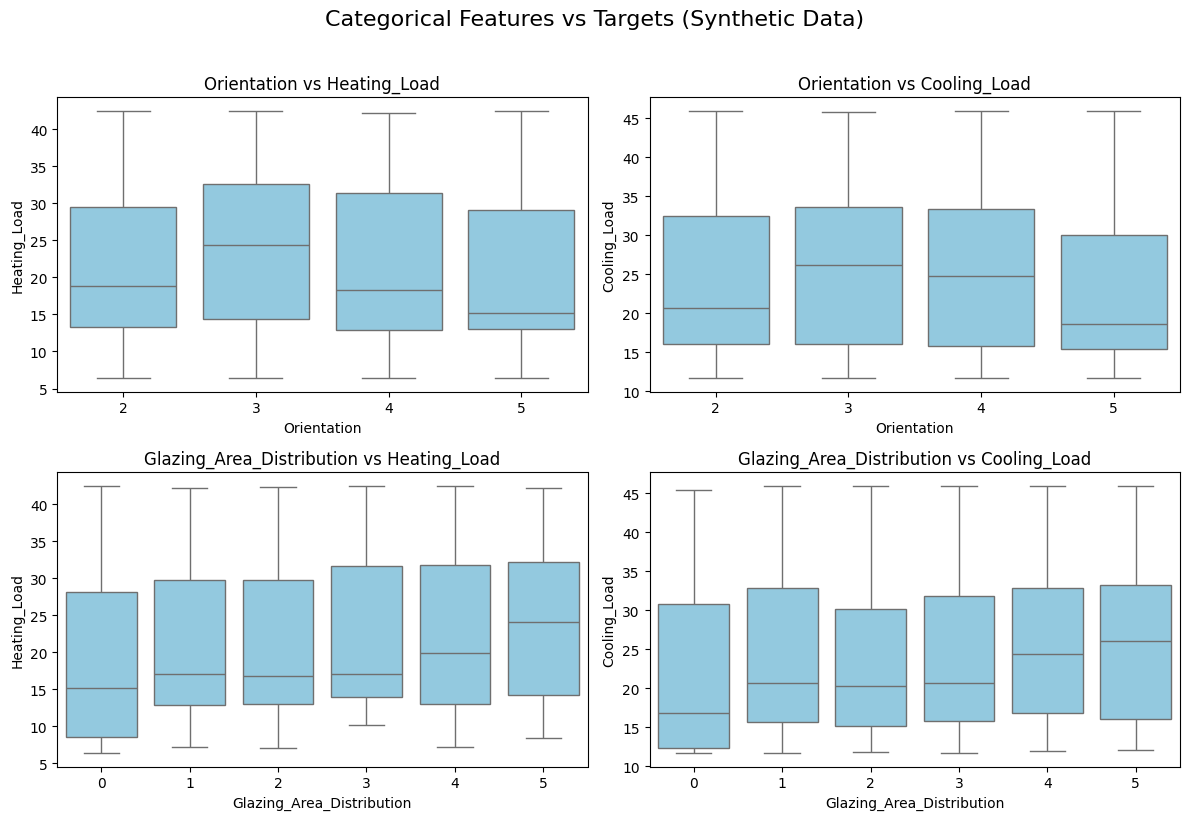

In [13]:
categorical_features = ["Orientation", "Glazing_Area_Distribution"]
target_vars = ["Heating_Load", "Cooling_Load"]

n_cols = len(target_vars)
n_rows = len(categorical_features)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12,8))
axes = axes.flatten()

for i, cat in enumerate(categorical_features):
    for j, target in enumerate(target_vars):
        sns.boxplot(x=synthetic_df[cat], y=synthetic_df[target], ax=axes[i*n_cols + j], color="skyblue")
        axes[i*n_cols + j].set_title(f"{cat} vs {target}")

plt.suptitle("Categorical Features vs Targets (Synthetic Data)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

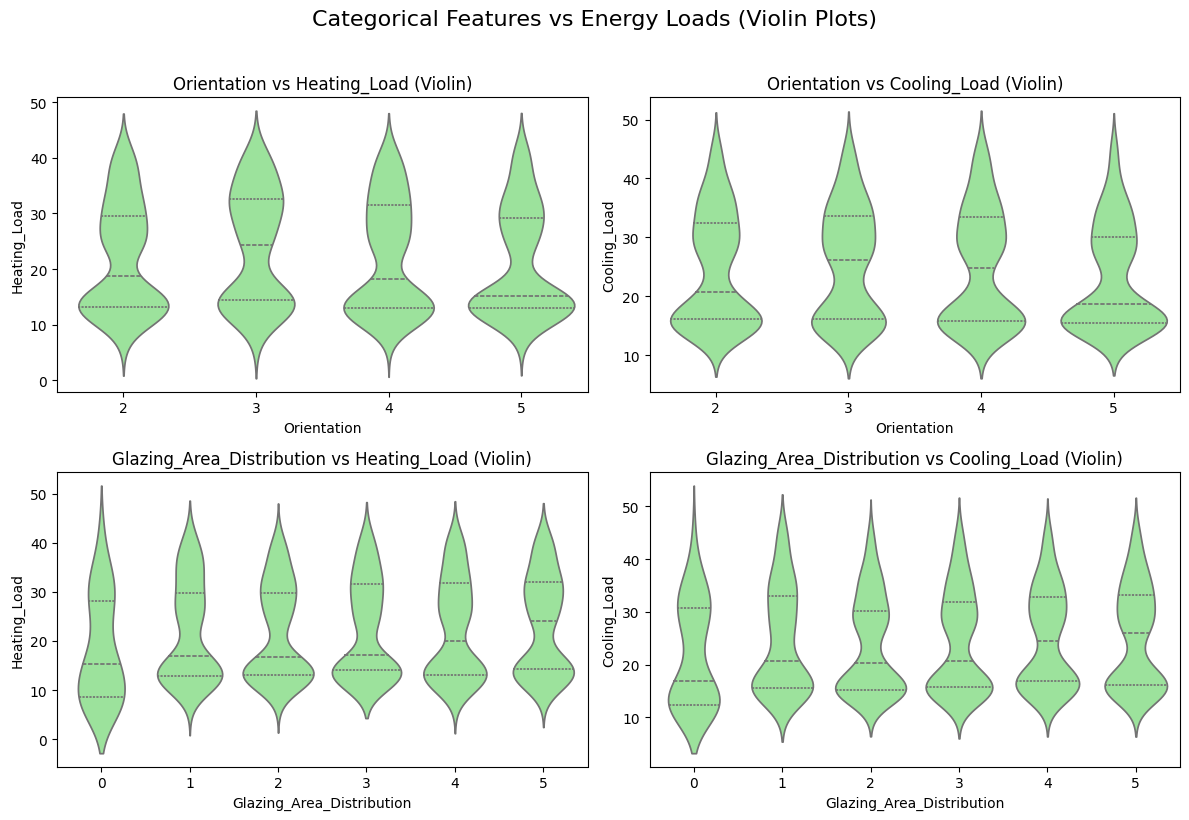

In [17]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()

for i, cat in enumerate(categorical_features):
    for j, target in enumerate(target_vars):
        sns.violinplot(x=synthetic_df[cat], y=synthetic_df[target], ax=axes[i*n_cols + j], inner="quartile", color="lightgreen")
        axes[i*n_cols + j].set_title(f"{cat} vs {target} (Violin)", fontsize=12)

plt.suptitle("Categorical Features vs Energy Loads (Violin Plots)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

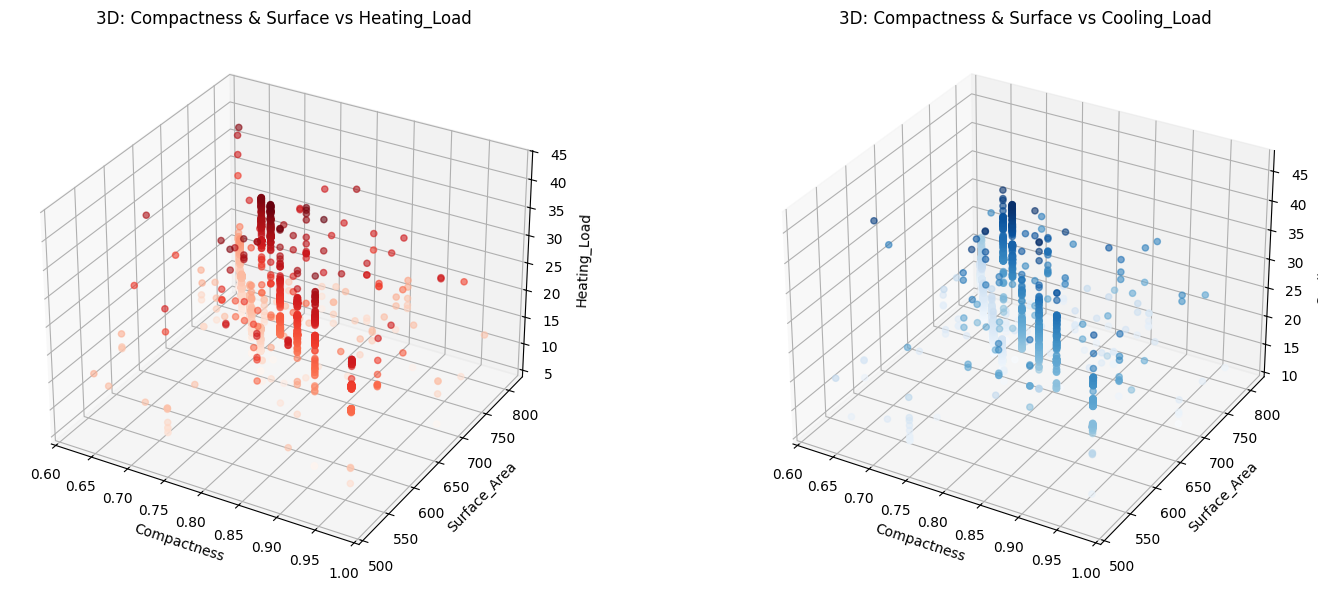

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.scatter(synthetic_df["Relative_Compactness"], synthetic_df["Surface_Area"], synthetic_df["Heating_Load"], c=synthetic_df["Heating_Load"], cmap="Reds", alpha=0.6)
ax1.set_title("3D: Compactness & Surface vs Heating_Load")
ax1.set_xlabel("Compactness")
ax1.set_ylabel("Surface_Area")
ax1.set_zlabel("Heating_Load")

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.scatter(synthetic_df["Relative_Compactness"], synthetic_df["Surface_Area"], synthetic_df["Cooling_Load"], c=synthetic_df["Cooling_Load"], cmap="Blues", alpha=0.6)
ax2.set_title("3D: Compactness & Surface vs Cooling_Load")
ax2.set_xlabel("Compactness")
ax2.set_ylabel("Surface_Area")
ax2.set_zlabel("Cooling_Load")

plt.tight_layout()
plt.show()

## 5. Advanced Predictive Modeling (Synthetic Data)

We replicate the advanced modeling pipeline:
- Linear Regression, Ridge, Lasso
- Random Forest, XGBoost, SVR
- Cross-validation metrics
- Feature importance via XGBoost
- SHAP interpretability

In [18]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer
import xgboost as xgb

# Features / Targets
X = synthetic_df.drop(["Heating_Load", "Cooling_Load"], axis=1)
y_heat = synthetic_df["Heating_Load"]
y_cool = synthetic_df["Cooling_Load"]

# Define scorers
scoring = {
    "R2": make_scorer(r2_score),
    "MAE": make_scorer(mean_absolute_error)
}

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42),
    "SVR": Pipeline([("scaler", StandardScaler()), ("svr", SVR(C=10, kernel="rbf"))])
}

In [20]:
from sklearn.model_selection import cross_validate

def evaluate_models(X, y, models, target_name):
    results = {}

    for name, model in models.items():
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)
        results[name] = {
            "R2_mean": cv_results["test_R2"].mean(),
            "MAE_mean": cv_results["test_MAE"].mean()
        }
    return pd.DataFrame(results).T.sort_values("R2_mean", ascending=False)

# Evaluate for Heating & Cooling
results_heat = evaluate_models(X, y_heat, models, "Heating_Load")
results_cool = evaluate_models(X, y_cool, models, "Cooling_Load")

print("Model Performance: Heating")
display(results_heat)
print("Model Performance: Cooling")
display(results_cool)

Model Performance: Heating


,R2_mean,MAE_mean
SVR,0.822624,2.824139
XGBoost,0.821379,2.792188
RandomForest,0.819508,2.868651
Linear,0.797071,3.160593
Ridge,0.797070,3.161722
Lasso,0.796389,3.167245


Model Performance: Cooling


,R2_mean,MAE_mean
XGBoost,0.867289,2.323314
RandomForest,0.863739,2.383299
SVR,0.854784,2.608849
Linear,0.819444,2.939142
Ridge,0.818981,2.936654
Lasso,0.818400,2.942475


### Model Benchmark Observations
- **Linear models** (Linear, Ridge, Lasso) perform decently but miss nonlinear interactions.  
- **RandomForest & XGBoost & SVR** typically dominate on tabular simulation data.  

 Advanced ensembles (RandomForest, XGBoost, SVR) provide the best tradeoff of accuracy and interpretability.

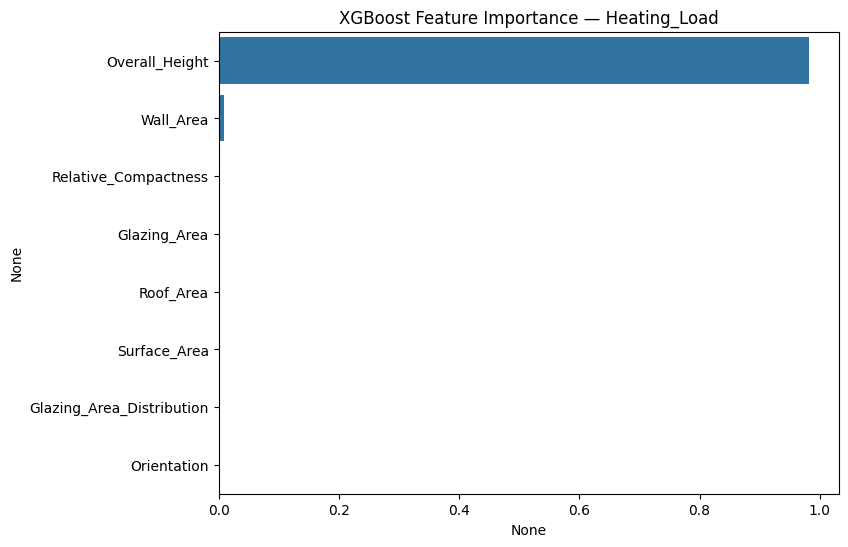

In [22]:
# Fit XGBoost for Heating_Load
xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X, y_heat)

importances = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(8,6))
sns.barplot(x=importances.sort_values(ascending=False),
            y=importances.sort_values(ascending=False).index)
plt.title("XGBoost Feature Importance — Heating_Load")
plt.show()

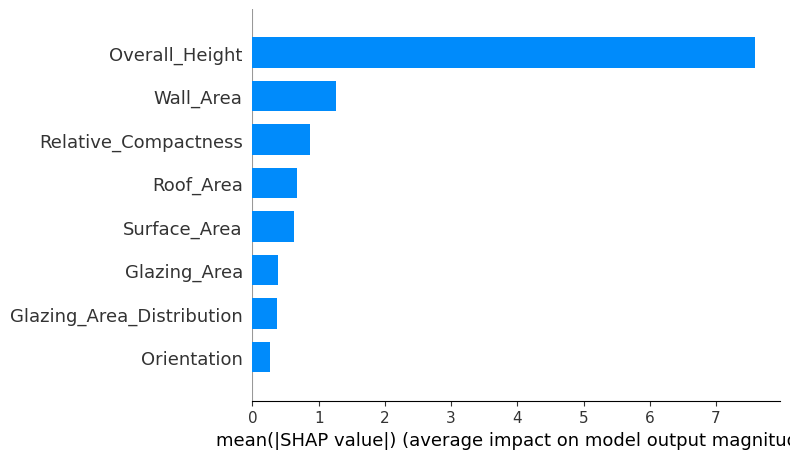

In [23]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

# Summary plot
shap.summary_plot(shap_values, X, plot_type="bar")

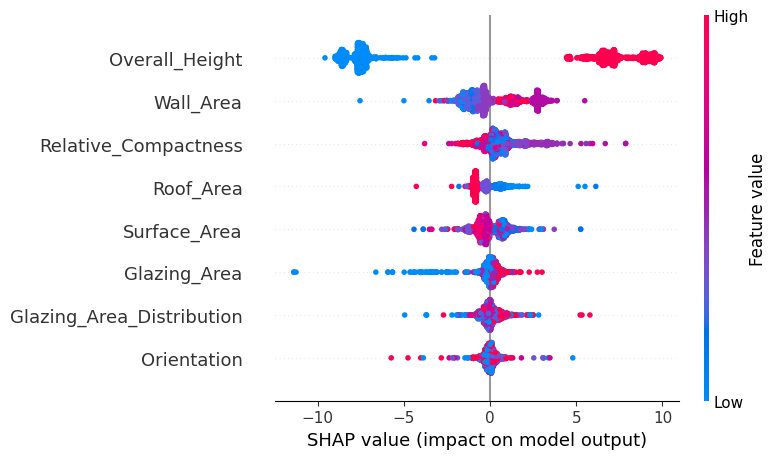

In [24]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)  # bar + beeswarm

## 6. Conclusion

In this notebook, we explored the synthetic dataset generated using **Mostly AI** based on the UCI Energy Efficiency dataset.

### Key Steps
1. Loaded and prepared the synthetic dataset (2000 rows, 10 columns).
2. Performed univariate, bivariate, and multivariate exploratory data analysis (EDA).
3. Trained predictive models (Linear Regression, Ridge, Lasso, Random Forest, XGBoost, and SVR).
4. Conducted feature importance and interpretability checks.

### Key Insights
- The synthetic dataset was structurally similar to the real dataset, with the same features and targets.
- Distributions of features and target variables were preserved.
- Predictive models trained on the synthetic dataset achieved **strong performance** on both Heating and Cooling load prediction tasks.
- Overall, the synthetic dataset proved to be useful for both exploratory and predictive modeling tasks.

### Next Steps
- In the next notebook (Notebook 03: Comparison), we will conduct a **direct, side-by-side analysis** of real vs synthetic datasets.
- This will include comparing distributions, correlations, feature importance, and model accuracy between the two datasets.
- The goal is to assess how well the synthetic dataset can stand in for the real one and to understand both strengths and limitations.
- Answer the business question at the end of our research, the fruition of this research at the end is how to optimally increase efficiency

---
With this, we close the synthetic dataset standalone analysis. The **final project stage will be a comparative study** combining insights from both notebooks.